In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("heart_disease_data.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [4]:
X = df.drop(columns='target',axis = 1)

In [5]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [6]:
Y = df['target']
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [8]:
model = LogisticRegression(max_iter=5000)

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
clf = RandomForestClassifier(max_depth=12, random_state=0)

In [9]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

In [13]:
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=12, random_state=0)

In [ ]:
train_predict = model.predict(x_train)

In [ ]:
rand_pred = clf.predict(x_train)

In [ ]:
from sklearn.metrics import f1_score,precision_score

In [22]:
test_predict_log = model.predict(x_test)
test_predict_rand = clf.predict(x_test)

In [23]:
metrics = {'Accuracy_train':[accuracy_score(y_train,train_predict),accuracy_score(y_train,rand_pred)],
           'F1 Score_train':[f1_score(y_train,train_predict),f1_score(y_train,rand_pred)],
           'Precision_train':[precision_score(y_train,train_predict),precision_score(y_train,rand_pred)],
           'Accuracy_test':[accuracy_score(y_test,test_predict_log),accuracy_score(y_test,test_predict_rand)],
           'F1 Score_test':[f1_score(y_test,test_predict_log),f1_score(y_test,test_predict_rand)],
           'Precision_test':[precision_score(y_test,test_predict_log),precision_score(y_test,test_predict_rand)],
           }

In [26]:
print("Metrics\t Logistic Regression\t Random Forest Classifier")
for i in metrics:
    print(i+'  '+str(metrics[i][0])+'  '+str(metrics[i][1]))

Metrics	 Logistic Regression	 Random Forest Classifier
Accuracy_train  0.8512396694214877  1.0
F1 Score_train  0.8695652173913043  1.0
Precision_train  0.8333333333333334  1.0
Accuracy_test  0.8032786885245902  0.8032786885245902
F1 Score_test  0.8333333333333334  0.8333333333333334
Precision_test  0.7692307692307693  0.7692307692307693


In [ ]:
patient_data = [{
    'name':input("Enter Name: ").strip(),
    'age': int(input('Age: ')),
    'sex': input('Sex: ').strip(),
    'cp': int(input("Chest Pain Type(0-3): ")),
    'trestbps': int(input("Resting Blood Pressure(1-120mg/dL<| 0): ")),
    'chol': int(input("Cholesterol:")),
    'fbs': int(input("Fasting Blood Sugar")),
    'restecg':int(input("Resting Electrocardiographic Results(0-2):")),
    'thalach':int(input("Maximum Heart Rate Achieved: ")),
    'exang': int(input("Exercise-Induced Angina(1 = Yes, 0 = No): ")),
    'oldpeak':float(input("Oldpeak: ")),
    'slope':int(input("Slope(0-2): ")),
    'ca': int(input("Number of Major Vessels Colored by Fluoroscopy(0-2): ")),
    'thal': int(input("Thalassemia: "))
}]

Enter Name: name
Age: 43
Sex: 1
Chest Pain Type(0-3): 0
Resting Blood Pressure(1-120mg/dL<| 0): 120
Cholesterol:177
Fasting Blood Sugar0
Resting Electrocardiographic Results(0-2):0
Maximum Heart Rate Achieved: 120
Exercise-Induced Angina(1 = Yes, 0 = No): 1
Oldpeak: 2.5
Slope(0-2): 1
Number of Major Vessels Colored by Fluoroscopy(0-2): 0
Thalassemia: 3


In [35]:
#del patient_data[0]['name']
data = pd.DataFrame.from_dict(patient_data)

print('You have less chances of stroke')if model.predict(data)==0 else print('You have high risk of stroke')


You have less chances of stroke


In [28]:
import joblib
joblib.dump(model, 'stroke_prediction_model.pkl')

['stroke_prediction_model.pkl']

In [29]:
joblib.dump(clf, 'rand_forest_class_model.pkl')

['rand_forest_class_model.pkl']

In [3]:
result = [{'Algorithm':'Logistic Regression','Accuracy_train':0.8512396694214877,'F1-Score_train': 0.8695652173913043,'Precision_train':0.8333333333333334 ,'Accuracy_test':0.8032786885245902,'F1 Score_test':0.8333333333333334,'Precision_test':0.7692307692307693},{'Algorithm':'Random Forest Classfier','Accuracy_train': 1.0,'F1-Score_train': 1.0,'Precision_train':1.0,'Accuracy_test': 0.8032786885245902,'F1 Score_test':0.8333333333333334,'Precision_test':0.7692307692307693}]

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
results = pd.DataFrame(result)

In [8]:
import numpy as np

Text(0.5, 1.0, 'Representation of Performance metrics')

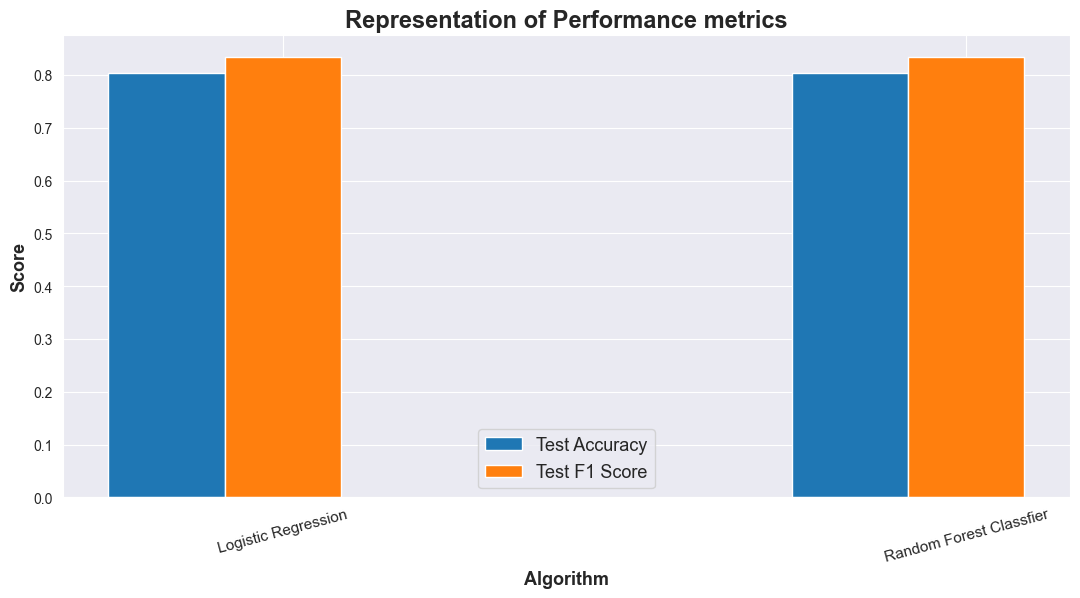

In [10]:
best_acc = results[results['Accuracy_test'] == results['Accuracy_test'].max()]
best_f1 = results[results['F1 Score_test'] == results['F1 Score_test'].max()]
best_precision = results[results['Precision_test'] == results['Precision_test'].max()]
#best_recall = results[results['Recall : Test'] == results['Recall : Test'].max()]

sns.set_style('darkgrid')
plt.figure(figsize = (13, 6))

barWidth = 0.17
 
# set height of bar
bars1 = results['Accuracy_test']
bars2 = results['F1 Score_test']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
pal = sns.color_palette()
plt.bar(r1, bars1, color= pal[0], width=barWidth, edgecolor='white', label='Test Accuracy')
plt.bar(r2, bars2, color= pal[1], width=barWidth, edgecolor='white', label='Test F1 Score')

# Add xticks on the middle of the group bars
plt.xlabel('Algorithm', fontweight='bold', fontsize = 13)
plt.ylabel('Score', fontweight = 'bold', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(bars1))], results['Algorithm'], rotation = 15, fontsize = 11)
 
# Create legend & Show graphic
plt.legend(fontsize = 13)

textstr = '\n'.join(['Best Accuracy: {:.3f} - {}'.format(best_acc['Accuracy_test'].values[0], best_acc['Algorithm'].values[0]), 
                     'Best F1 Score: {:.3f} - {}'.format(best_f1['F1 Score_test'].values[0], best_f1['Algorithm'].values[0])])
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)
#plt.text(3.2, 12, textstr, fontsize=14,  bbox=props)

plt.title('Representation of Performance metrics', fontweight = 'bold', fontsize = 17)